このノートブックは下記の参考文献を元にKaggleの「House Prices」コンペデータを使用して

欠損値処理（多重代入法）を学んだ。


# 【参考文献】

・[Package ‘mice’](https://cran.r-project.org/web/packages/mice/mice.pdf)

・[欠測データ処理: Rによる単一代入法と多重代入法 (統計学One Point)](https://www.amazon.co.jp/%E6%AC%A0%E6%B8%AC%E3%83%87%E3%83%BC%E3%82%BF%E5%87%A6%E7%90%86-R%E3%81%AB%E3%82%88%E3%82%8B%E5%8D%98%E4%B8%80%E4%BB%A3%E5%85%A5%E6%B3%95%E3%81%A8%E5%A4%9A%E9%87%8D%E4%BB%A3%E5%85%A5%E6%B3%95-%E7%B5%B1%E8%A8%88%E5%AD%A6One-%E9%AB%98%E6%A9%8B-%E5%B0%86%E5%AE%9C/dp/4320112563/ref=asc_df_4320112563/?tag=jpgo-22&linkCode=df0&hvadid=295662004514&hvpos=&hvnetw=g&hvrand=5756698493891438490&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1009280&hvtargid=pla-526474819081&psc=1&th=1&psc=1)

In [1]:
data　=　read.table("data3.csv", sep=",", na.strings=c("", "NULL"," "), header=TRUE, row.names=1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolQC_C,Fence_C,MiscFeature_C,SaleType_C,SaleCondition_C,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,60,RL,65,13.83305,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4006,35.57615,12.159330,3.5,18.736117
1,20,RL,80,14.11792,Pave,None,Reg,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,3952,35.37189,11.986132,2.5,51.635458
2,60,RL,68,14.47651,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4003,36.24107,12.018506,3.5,14.654640
3,70,RL,60,14.10620,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.0000000,1267,101,3885,35.12072,11.652616,2.0,52.609462
4,60,RL,84,15.02201,Pave,None,IR1,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,4000,39.00232,12.545010,3.5,49.205231
5,50,RL,85,14.99826,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,9.988023,0.5979389,1267,1198,3988,33.48580,11.832977,2.5,61.122759
6,20,RL,75,14.22859,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4009,39.15129,12.711877,3.0,53.145789
7,60,RL,NA,14.29435,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.5979389,1267,1198,3946,38.40331,12.647972,3.5,85.416669
8,50,RM,51,13.12699,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,101,3881,36.33414,11.460820,2.0,51.308263


In [2]:
data$MSSubClass<- as.factor(data$MSSubClass)
data$YrSold<- as.factor(data$YrSold)
data$MoSold<- as.factor(data$MoSold)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolQC_C,Fence_C,MiscFeature_C,SaleType_C,SaleCondition_C,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,60,RL,65,13.83305,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4006,35.57615,12.159330,3.5,18.736117
1,20,RL,80,14.11792,Pave,None,Reg,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,3952,35.37189,11.986132,2.5,51.635458
2,60,RL,68,14.47651,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4003,36.24107,12.018506,3.5,14.654640
3,70,RL,60,14.10620,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.0000000,1267,101,3885,35.12072,11.652616,2.0,52.609462
4,60,RL,84,15.02201,Pave,None,IR1,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,4000,39.00232,12.545010,3.5,49.205231
5,50,RL,85,14.99826,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,9.988023,0.5979389,1267,1198,3988,33.48580,11.832977,2.5,61.122759
6,20,RL,75,14.22859,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4009,39.15129,12.711877,3.0,53.145789
7,60,RL,NA,14.29435,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.5979389,1267,1198,3946,38.40331,12.647972,3.5,85.416669
8,50,RM,51,13.12699,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,101,3881,36.33414,11.460820,2.0,51.308263


In [3]:
library(mice); library(lattice)
imp.data <- mice(data, m=10, seed=42, meth="rf")

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind




 iter imp variable
  1   1  LotFrontage  SalePrice
  1   2  LotFrontage  SalePrice
  1   3  LotFrontage  SalePrice
  1   4  LotFrontage  SalePrice
  1   5  LotFrontage  SalePrice
  1   6  LotFrontage  SalePrice
  1   7  LotFrontage  SalePrice
  1   8  LotFrontage  SalePrice
  1   9  LotFrontage  SalePrice
  1   10  LotFrontage  SalePrice
  2   1  LotFrontage  SalePrice
  2   2  LotFrontage  SalePrice
  2   3  LotFrontage  SalePrice
  2   4  LotFrontage  SalePrice
  2   5  LotFrontage  SalePrice
  2   6  LotFrontage  SalePrice
  2   7  LotFrontage  SalePrice
  2   8  LotFrontage  SalePrice
  2   9  LotFrontage  SalePrice
  2   10  LotFrontage  SalePrice
  3   1  LotFrontage  SalePrice
  3   2  LotFrontage  SalePrice
  3   3  LotFrontage  SalePrice
  3   4  LotFrontage  SalePrice
  3   5  LotFrontage  SalePrice
  3   6  LotFrontage  SalePrice
  3   7  LotFrontage  SalePrice
  3   8  LotFrontage  SalePrice
  3   9  LotFrontage  SalePrice
  3   10  LotFrontage  SalePrice
  4   1  LotFront

Warning message:
“Number of logged events: 105”

In [4]:
fit<-with(imp.data, glm(SalePrice ~ Neighborhood + OverallQual + GrLivArea + LotFrontage + LotArea + LotShape + LandContour + LandSlope + LotConfig))

In [5]:
summary(pool(fit))

,estimate,std.error,statistic,df,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.1541837304,0.1671507570,48.7834089,21.41733,0.000000e+00
NeighborhoodBlueste,-0.1972170814,0.0910718051,-2.1655119,44.44177,3.575585e-02
NeighborhoodBrDale,-0.3135177617,0.0582915296,-5.3784446,93.21113,5.550512e-07
NeighborhoodBrkSide,-0.2529984331,0.0510640055,-4.9545356,60.90447,6.085036e-06
NeighborhoodClearCr,-0.0886187902,0.0628501418,-1.4100014,49.89590,1.647427e-01
NeighborhoodCollgCr,-0.0606499568,0.0414317429,-1.4638524,278.87038,1.443606e-01
NeighborhoodCrawfor,-0.1100601050,0.0538806774,-2.0426637,51.66304,4.620386e-02
NeighborhoodEdwards,-0.2433969552,0.0472140709,-5.1551783,88.00119,1.542235e-06
NeighborhoodGilbert,-0.1307973700,0.0447096211,-2.9254860,163.56115,3.928186e-03


In [6]:
complete(imp.data, 1)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolQC_C,Fence_C,MiscFeature_C,SaleType_C,SaleCondition_C,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
60,RL,65,13.83305,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4006,35.57615,12.159330,3.5,18.736117
20,RL,80,14.11792,Pave,None,Reg,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,3952,35.37189,11.986132,2.5,51.635458
60,RL,68,14.47651,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4003,36.24107,12.018506,3.5,14.654640
70,RL,60,14.10620,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.0000000,1267,101,3885,35.12072,11.652616,2.0,52.609462
60,RL,84,15.02201,Pave,None,IR1,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,4000,39.00232,12.545010,3.5,49.205231
50,RL,85,14.99826,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,9.988023,0.5979389,1267,1198,3988,33.48580,11.832977,2.5,61.122759
20,RL,75,14.22859,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4009,39.15129,12.711877,3.0,53.145789
60,RL,78,14.29435,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.5979389,1267,1198,3946,38.40331,12.647972,3.5,85.416669
50,RM,51,13.12699,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,101,3881,36.33414,11.460820,2.0,51.308263


In [7]:
complete(imp.data, 10)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolQC_C,Fence_C,MiscFeature_C,SaleType_C,SaleCondition_C,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
60,RL,65,13.83305,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4006,35.57615,12.159330,3.5,18.736117
20,RL,80,14.11792,Pave,None,Reg,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,3952,35.37189,11.986132,2.5,51.635458
60,RL,68,14.47651,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4003,36.24107,12.018506,3.5,14.654640
70,RL,60,14.10620,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.0000000,1267,101,3885,35.12072,11.652616,2.0,52.609462
60,RL,84,15.02201,Pave,None,IR1,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,4000,39.00232,12.545010,3.5,49.205231
50,RL,85,14.99826,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,9.988023,0.5979389,1267,1198,3988,33.48580,11.832977,2.5,61.122759
20,RL,75,14.22859,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4009,39.15129,12.711877,3.0,53.145789
60,RL,75,14.29435,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.5979389,1267,1198,3946,38.40331,12.647972,3.5,85.416669
50,RM,51,13.12699,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,101,3881,36.33414,11.460820,2.0,51.308263


In [8]:
dataimp<-complete(imp.data,)

In [9]:
dataimpdf<-data.frame(dataimp)

In [10]:
dataimpdf

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolQC_C,Fence_C,MiscFeature_C,SaleType_C,SaleCondition_C,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
60,RL,65,13.83305,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4006,35.57615,12.159330,3.5,18.736117
20,RL,80,14.11792,Pave,None,Reg,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,3952,35.37189,11.986132,2.5,51.635458
60,RL,68,14.47651,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4003,36.24107,12.018506,3.5,14.654640
70,RL,60,14.10620,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.0000000,1267,101,3885,35.12072,11.652616,2.0,52.609462
60,RL,84,15.02201,Pave,None,IR1,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,4000,39.00232,12.545010,3.5,49.205231
50,RL,85,14.99826,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,9.988023,0.5979389,1267,1198,3988,33.48580,11.832977,2.5,61.122759
20,RL,75,14.22859,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4009,39.15129,12.711877,3.0,53.145789
60,RL,78,14.29435,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.5979389,1267,1198,3946,38.40331,12.647972,3.5,85.416669
50,RM,51,13.12699,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,101,3881,36.33414,11.460820,2.0,51.308263


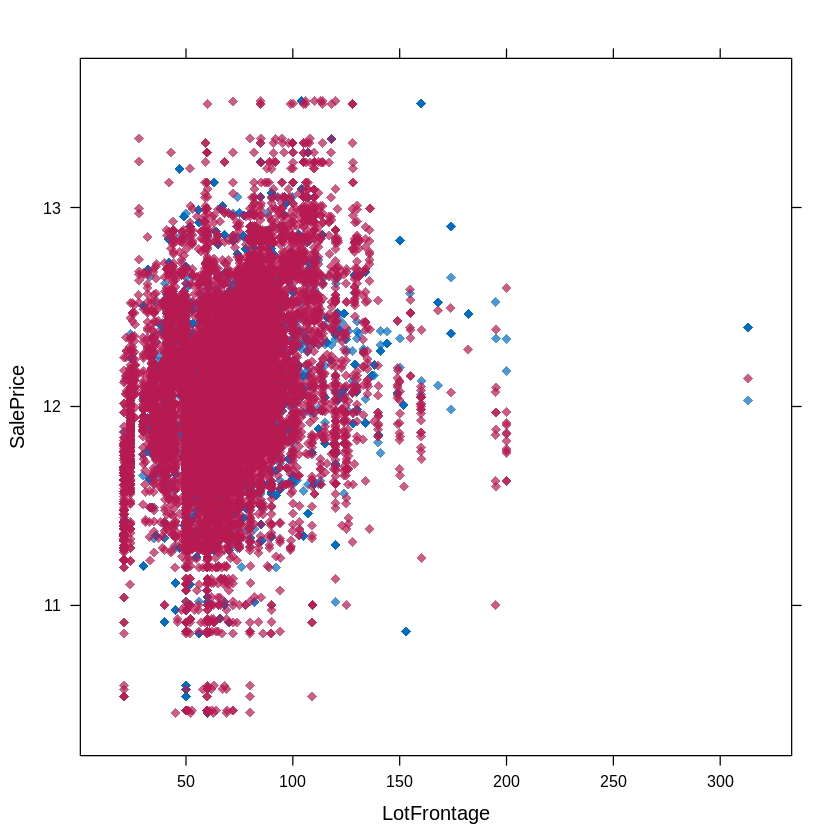

In [11]:
library(lattice) 
xyplot(imp.data,SalePrice ~ LotFrontage,pch=18,cex=1)

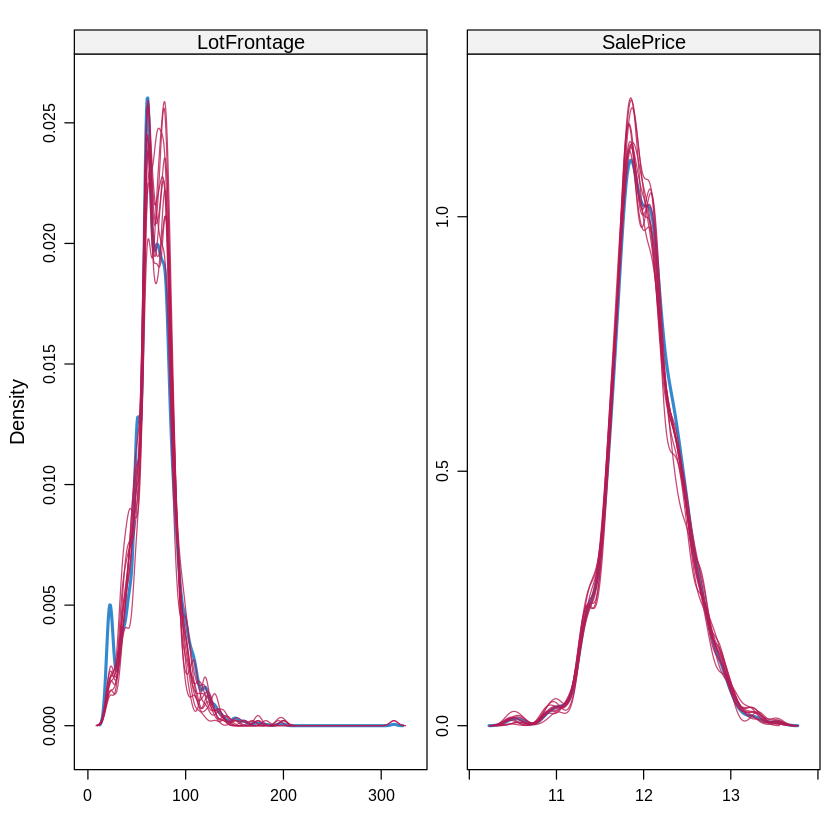

In [12]:
densityplot(imp.data)

In [13]:
dataimp

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolQC_C,Fence_C,MiscFeature_C,SaleType_C,SaleCondition_C,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
60,RL,65,13.83305,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4006,35.57615,12.159330,3.5,18.736117
20,RL,80,14.11792,Pave,None,Reg,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,3952,35.37189,11.986132,2.5,51.635458
60,RL,68,14.47651,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4003,36.24107,12.018506,3.5,14.654640
70,RL,60,14.10620,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.0000000,1267,101,3885,35.12072,11.652616,2.0,52.609462
60,RL,84,15.02201,Pave,None,IR1,Lvl,AllPub,FR2,⋯,0,0.000000,0.0000000,1267,1198,4000,39.00232,12.545010,3.5,49.205231
50,RL,85,14.99826,Pave,None,IR1,Lvl,AllPub,Inside,⋯,0,9.988023,0.5979389,1267,1198,3988,33.48580,11.832977,2.5,61.122759
20,RL,75,14.22859,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,1198,4009,39.15129,12.711877,3.0,53.145789
60,RL,78,14.29435,Pave,None,IR1,Lvl,AllPub,Corner,⋯,0,0.000000,0.5979389,1267,1198,3946,38.40331,12.647972,3.5,85.416669
50,RM,51,13.12699,Pave,None,Reg,Lvl,AllPub,Inside,⋯,0,0.000000,0.0000000,1267,101,3881,36.33414,11.460820,2.0,51.308263


In [14]:
"""
for(i in 1:10){
    dataimp<-complete(imp.data, i)
    dataimpdf<-data.frame(dataimp)
    write.csv(dataimpdf,sprintf("./micedata/log_rf__micedata%d.csv", i))
} 
"""